## Домашнее задание №3 (курс "Практикум по программированию на языке Python")

### Выполнил: <font color='red'>ФИО, ВУЗ, Факультет</font>

### Тема: Основы анализа данных и машинного обучения

#### Преподаватель: Мурат Апишев (mel-lain@yandex.ru)

**Выдана**:   27 марта 2023

**Дедлайн**:   21:00 9 апреля 2023

**Среда выполнения**: Jupyter Notebook (Python 3.7+)

#### Правила:

Результат выполнения задания - Jupyter Notebook с кодом и подробными ответами в случае теоретических вопросов. __Максимальное число баллов за задание - 20__.

Все ячейки должны быть "выполненными", при этом результат должен воспроизводиться при проверке (на Python 3.7). Если какой-то код не был запущен или отрабатывает с ошибками, то пункт не засчитывается. Задание, сданное после дедлайна, _не принимается_. Можно отправить недоделанное задание, выполненные пункты будут оценены.

Готовое задание отправляется на почту преподавателя.

Задание выполняется самостоятельно. Если какие-то студенты будут уличены в списывании, все они автоматически получат за эту работу 0 баллов. Если вы нашли в Интернете какой-то специфичный код, который собираетесь заимствовать, обязательно укажите это в задании - наверняка вы не единственный, кто найдёт и использует эту информацию.

Удалять фрагменты формулировок заданий запрещается.

#### Постановка задачи:

- В данной работе нужно решить ряд задач c использованием библиотек для обработки данных и машинного обучения, а также дать ичерпывающие ответы на поставленные вопросы.
- В задачах 1-3 запрещается использовать циклы, генераторы списков и списковые включения, а также функции высшего порядка, необходимо написать тесты, проверяющие работу решения в обычных и крайних случаях.
- Даже если это не указано явно в требованиях, код должен быть по возможности неизбыточным, работать с разумной сложностью и объёмом потребялемой памяти, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Результирующий код должен быть читаемым, с единой системой отступов и адеквантными названиями переменных, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Везде, где это требуется, должны быть отрисованы необходимые графики и даны комментарии и выводы.

Вопросы:
1. Является ли extend генератором списка?
2. В последней задаче нужно двигать всю строчку или вставить два пробела?

__Задание 1 (0.5 балла):__ Проверить, что все элементы входного массива строго положительны.

In [28]:
import numpy as np

In [29]:
def task_1(arr):
    return np.amin(arr) > 0

In [30]:
arr = np.array([0, 1, 2, 3])
print(f"Should be False | result = {task_1(arr)}")
arr = np.array([10, 1, 2, 3])
print(f"Should be True  | result = {task_1(arr)}")

Should be False | result = False
Should be True  | result = True


__Задание 2 (0.5 балла):__ В векторе повторить все значения `n` раз. Пример: для массива `[1, 2, 3]` и `n` равного 3 ответом должен быть массив `[1, 1, 1, 2, 2, 2, 3, 3, 3]`.

In [31]:
def task_2(arr, n):
    return np.repeat(arr, n)

In [32]:
vec = [1, 2, 3]
print(f"Should be [1, 1, 1, 2, 2, 2, 3, 3, 3] | result = {task_2(vec, 3)}")
vec1 = np.array(vec)
print(f"Should be [1, 1, 1, 2, 2, 2, 3, 3, 3] | result = {task_2(vec1, 3)}")

Should be [1, 1, 1, 2, 2, 2, 3, 3, 3] | result = [1 1 1 2 2 2 3 3 3]
Should be [1, 1, 1, 2, 2, 2, 3, 3, 3] | result = [1 1 1 2 2 2 3 3 3]


__Задание 3 (1 балл):__ Для векторов `V` и `v` построить вектор, в котором на 0-й позиции будет находиться сумма первых `v[0]` элементов вектора `V`, на 1-й - следующих `v[1]` элементов, и т.д. Гарантируется, что элементов в `V` достаточное количество. Пример: для массивов `V=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]` и `v=[2, 1, 3]` ответом будет `[3, 3, 15]`.

In [33]:
def task_3(V, v):
    tmp = []
    i_start = 0 
    i_end = 0
    for el in v:
        i_end = i_start + el
        tmp.append(sum(V[i_start:i_end]))
        i_start = i_end
        
    return tmp

In [34]:
V=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
v=[2, 1, 3]
print(task_3(V, v))

[3, 3, 15]


Для решения следующих заданий скачайте набор данных 20 News Group с помощью следующего кода:

In [35]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt

In [36]:

X_train = fetch_20newsgroups(subset='train')
X_test = fetch_20newsgroups(subset='test')

label_names = pd.DataFrame(columns=['label_name', 'label_id'],
                           data=[(e, i) for i, e in enumerate(list(X_train.target_names))])
data = pd.DataFrame()
data['text'] = X_train.data + X_test.data
data['is_train'] = [True] * len(X_train.data) + [False] * len(X_test.data)
data['label_id'] = list(X_train.target) + list(X_test.target)

__Задание 4 (1 балл):__ Используя возможности библиотеки pandas

- сделайте join таблиц `data` и `label_names`, удалив из итоговой таблицы поле `label_id`
- посчитайте количество обучающих и тестовых данных
- постройте круговую диаграмму, показывающую долю каждого класса в обучающих данных

In [37]:
data['label_name'] = data['label_id'].apply(lambda id: label_names['label_name'][label_names['label_id'].iloc[id]])
data = data.drop(columns='label_id')
#data.sum()
data

,text,is_train,label_name
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,True,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,True,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,True,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,True,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,True,sci.space
...,...,...,...
18841,From: richmond@spiff.Princeton.EDU (Stupendous...,False,sci.space
18842,From: smytonj@murr11.alleg.edu (Jim Smyton)\nS...,False,comp.sys.mac.hardware
18843,From: hhenderson@vax.clarku.edu\nSubject: RE: ...,False,rec.sport.baseball
18844,From: b859zam@utarlg.uta.edu \nSubject: INTEL ...,False,misc.forsale


In [38]:
data['is_train'].value_counts()

True     11314
False     7532
Name: is_train, dtype: int64

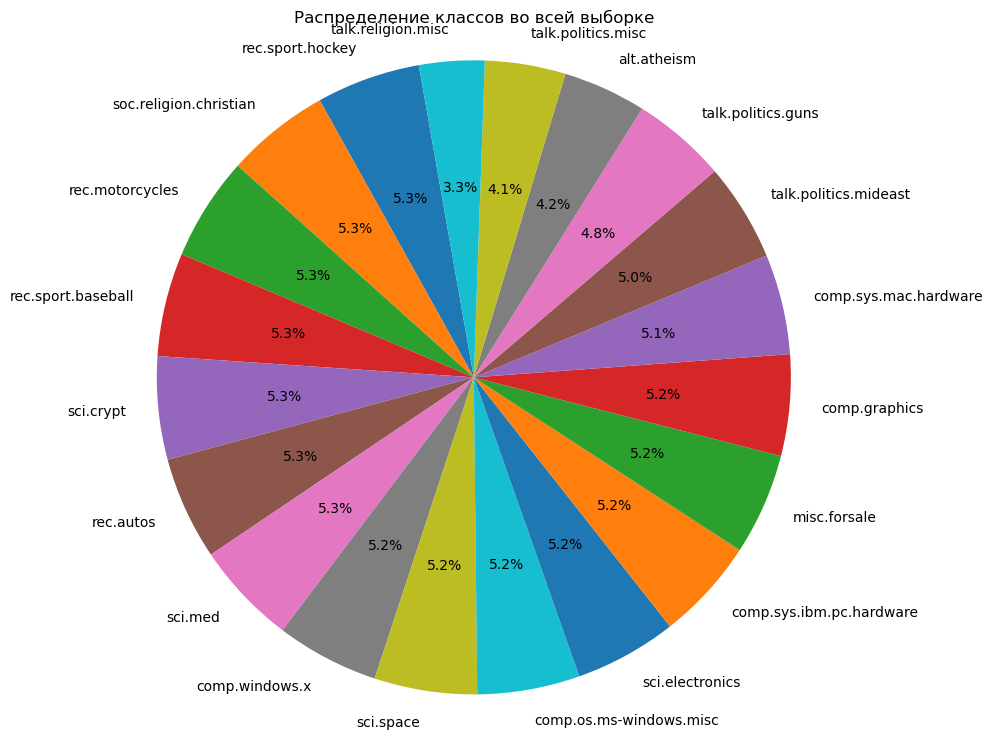

In [39]:
fig, ax = plt.subplots(figsize=(9,9))

x = data['label_name'].value_counts().to_numpy()
labels = data['label_name'].value_counts().index.tolist()
ax.pie(x, labels=labels, autopct='%1.1f%%', shadow=False, startangle=100)
ax.axis('equal')  
ax.set_title("Распределение классов во всей выборке")

plt.show()

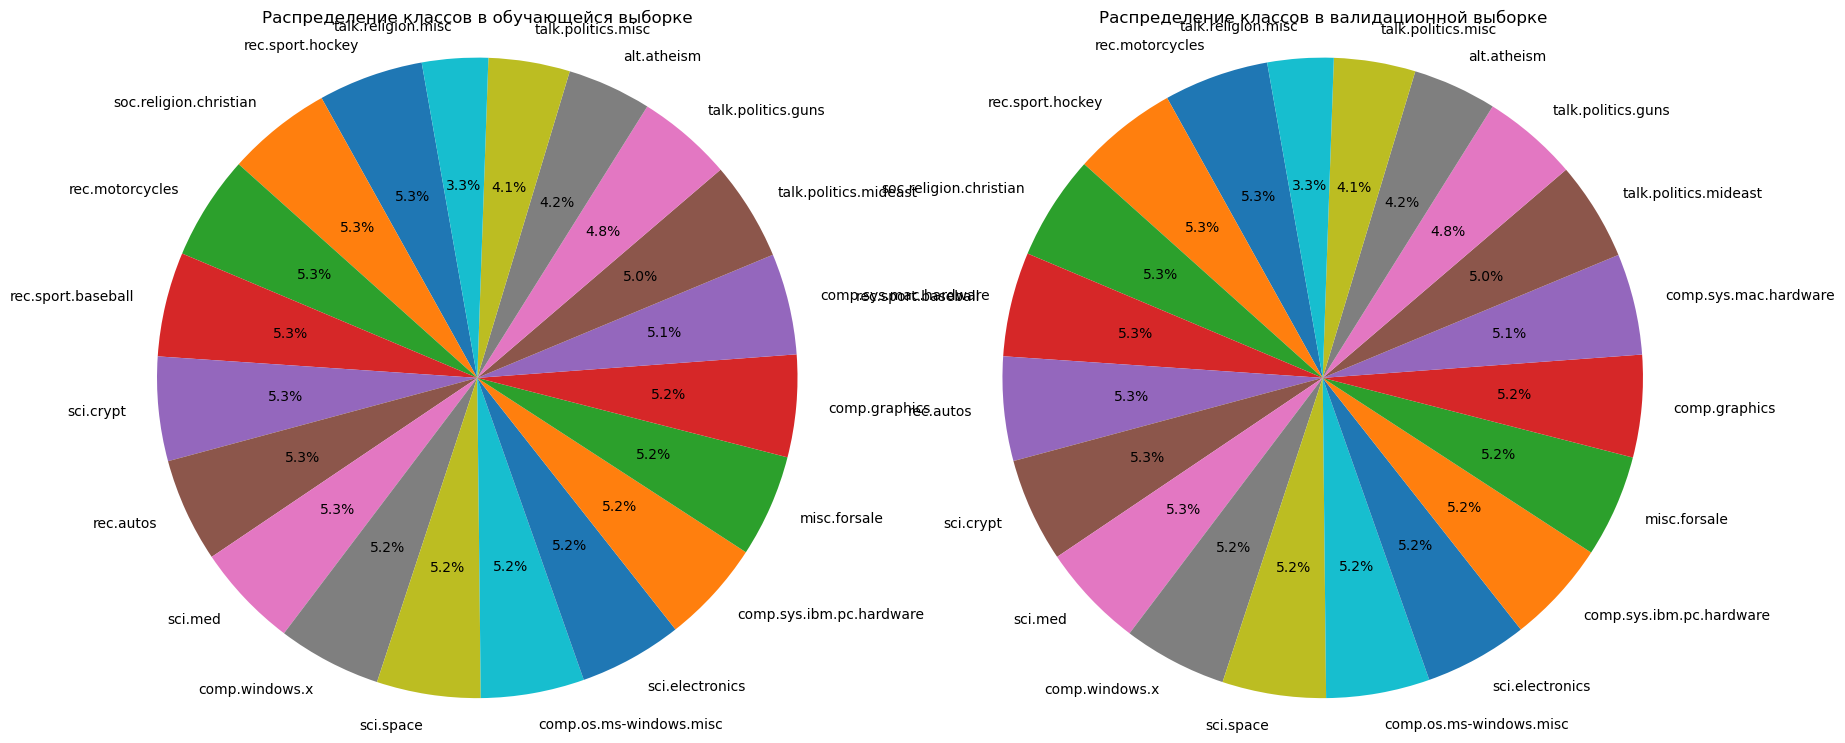

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,9))
x = data['label_name'][0:11313].value_counts().to_numpy()
labels = data['label_name'][0:11313].value_counts().index.tolist()
ax[0].pie(x, labels=labels, autopct='%1.1f%%', shadow=False, startangle=100)
ax[0].axis('equal')  
ax[0].set_title("Распределение классов в обучающейся выборке")

x = data['label_name'][11313:].value_counts().to_numpy()
labels = data['label_name'][11313:].value_counts().index.tolist()
ax[1].pie(x, labels=labels, autopct='%1.1f%%', shadow=False, startangle=100)
ax[1].axis('equal')  
ax[1].set_title("Распределение классов в валидационной выборке")

plt.show()

__Задание 5 (2 балла):__ Каждый объект представляет собой текст. Чаще всего тексты предобрабатывают перед тем, как пытаться выделять из них признаки. Опишите функцию `preprocess`, которая получает на вход сырой текст и возвращает предобработанный. Примените эту функцию к элементу `text` каждого объекта и результат запишите в столбец `pp_text` (далее под текстом подразумевается именно содержимое этого столбца). За пределами `preprocess` циклами пользоваться запрещено (т.е. предобработка должна применяться средствами DataFrame). Функция должна выполнять следующий набор операций:

- привести текст к нижнему регистру
- заменить все символы '\n', '\t' и '\r' на пробелы
- заменить в тексте все символы, не являющиеся английскими буквами, на пробелы
- сделать split текста по пробелам, удалив все пустые слова
- вернуть получившийся список слов

Для ускорения `preprocess` может использовать внешние переменные, например, скомпилированные регулярные выражения.

In [41]:
def preprocess(text):    
    #text = t.copy
    text = text.replace("\n", " ")
    text = text.replace("\t", " ")
    text = text.replace("\r", " ")
    # replace upper symbols
    for l in range(ord('Z') - ord('A')):
        text = text.replace(chr(l + ord('A')), chr(l + ord('a')))
    for j in range(len(text)):
        if ord('a') > ord(text[j]) or ord(text[j]) > ord('z'):
            text = text.replace(text[j], ' ')
    return [el for el in text.split(' ') if el != '']
    
    
def task_5(data_ar):
    data_ar['text'] = data['text'].apply(lambda txt: ' '.join(str(x) for x in preprocess(txt)))
    return data_ar

In [42]:
data

,text,is_train,label_name
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,True,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,True,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,True,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,True,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,True,sci.space
...,...,...,...
18841,From: richmond@spiff.Princeton.EDU (Stupendous...,False,sci.space
18842,From: smytonj@murr11.alleg.edu (Jim Smyton)\nS...,False,comp.sys.mac.hardware
18843,From: hhenderson@vax.clarku.edu\nSubject: RE: ...,False,rec.sport.baseball
18844,From: b859zam@utarlg.uta.edu \nSubject: INTEL ...,False,misc.forsale


In [43]:
new_data = task_5(data)
new_data

,text,is_train,label_name
0,from lerxst wam umd edu where s my thing subje...,True,rec.autos
1,from guykuo carson u washington edu guy kuo su...,True,comp.sys.mac.hardware
2,from twillis ec ecn purdue edu thomas e willis...,True,comp.sys.mac.hardware
3,from jgreen amber joe green subject re weitek ...,True,comp.graphics
4,from jcm head cfa harvard edu jonathan mcdowel...,True,sci.space
...,...,...,...
18841,from richmond spiff princeton edu stupendous m...,False,sci.space
18842,from smytonj murr alleg edu jim smyton subject...,False,comp.sys.mac.hardware
18843,from hhenderson vax clarku edu subject re game...,False,rec.sport.baseball
18844,from b zam utarlg uta edu subject intel chmos ...,False,misc.forsale


__Задание 6 (2 балла):__ Каждое уникальное слово текста представляет собой признак. Посчитайте, сколько в обучающих текстах есть уникальных слов, отобразите гистограмму частот встречаемости слов в обучающей коллекции, 
отсортировав слова по убыванию частоты встречаемости (по оси X идут все слова из словаря коллекции в порядке убывания частоты встречаемости, по оси Y указываются значения частот).

Для уменьшения признакового пространства словарь фильтруют. Удалите из словаря

- все слова, встречающиеся более 9000-х раз
- все слова, встречающиеся менее 3-х раз
- все слова длиной менее 3 символов
- все слова длиной более 20 символов
- все слова, состоящие из одного и того же символа

Профильтруйте обучающую коллекцию по новому словарю и снова посчитайте число уникальных слов в словаре и снова постройте гистограмму частот.

In [53]:
from collections import Counter

vocabulary = Counter()

def task_6(data_ar, vocab):
    for txt in data_ar['text']:
        list_of_words = txt.split(' ')
        for word in list_of_words:
            if word not in vocab:
                vocab[word] = 0
            vocab[word] += 1

In [54]:
task_6(new_data, vocabulary)

In [55]:
len(vocabulary)

112527

In [46]:
def check_word(word):
    return len(set(word)) == 1
for word in list(vocabulary):
    if vocabulary[word] < 3 or vocabulary[word] > 9000 \
        or len(word) > 20 or len(word) < 3 or check_word(word):
        del vocabulary[word]

In [47]:
word_list = [(vocabulary[word], word) for word in vocabulary]


In [48]:
new_word_list = sorted(word_list, key=lambda x: x[0])

__Задание 7 (1.5 балла):__ Для построения моделей данные нужно перевести в числовой вид. Для этого воспользуйтесь представлением "мешка слов", в котором признаками являются слова, а значениями - частоты их встречаемости в документе. Построить представление мешка слов можно с помощью класса CountVectorizer из sklearn. Подготовьте векторизатор, подав ему обучающие текстовые данные из `data` (приведите тексты к формату входа векторизатора) и полученный выше словарь.

Примените полученный векторизатор к обучающим и тестовым данным, на выходе должны получиться два numpy array (первая размерность - число объектов, вторая - число слов в словаре).

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

def task_7():
    # vectorizer = ...
    pass

    # assert len(vectorizer.vocabulary_) == len(vocabulary)

__Задание 8 (1.5 балла):__ Модель логистической регрессии хорошо работает для простых задач классификации текстов, примените её к полученным данным. Для этого настройте модель на обучающих данных, сделайте предсказание для тестовых и измерьте качество с помощью метрик accuracy и F1-score с микро- и макро-усреднением. Попробуйте подобрать оптимальное значение коэффициента регуляризации С с помощью GridSearchCV.

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

def task_8():
    # vectorizer = ...
    pass

    # assert len(vectorizer) == len(vocabulary)

__Задание 9 (1.5 балл):__ Ошибки классификации удобно анализировать с помощью матрицы ошибок. Сделав предсказание на тесте постройте и визуализируйте эту матрицу с помощью функции plot_confusion_matrix в двух вариантах: с абсолютными и относительными (нормированными) значеними. Определите классы, которые чаще всего путаются между собой.

In [51]:
from sklearn.metrics import plot_confusion_matrix

def task_9():
    pass

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\ProgramData\miniconda3\lib\site-packages\sklearn\metrics\__init__.py)

__Задание 10 (2.5 балла):__ Установите библиотеку XGBoost и обучите модель градиентного бустинга для решения поставленной задачи классификации. Попробуйте подобрать оптимальную модель, выбрав 2-3 важных параметра обучения. Укажите, какие параметры в большей, а какие - в меньшей степени оказали влияние на итоговое качество модели.

In [ ]:
from xgboost import XGBClassifier

def task_10():
    pass

__Задание 11 (3 балла):__ Часто в обработке текстов возникает задача выделения тем, обсуждаемых в них. Одним из способов решения это задачи является кластеризация графа совстречаемостей слов. Для текстов, находящихся в поле `pp_text` постройте словарь "слово" в "слово" в "счетчик совстречаемости", для слова A и B достаточно хранить A -> B -> counter, хранить B -> A -> counter не нужно. Счетчик увеличивается на 1, если пара слов встретилась в одном тексте внутри окна с длиной 10 слов.

In [ ]:
def task_11():
    pass

__Задание 12 (3 балла):__ Приняв каждое слово за вершину, а ребра между ними - за наличие совместной встречаемости, постройте граф совстречаемостей. Все ребра равнозначны, ребро добавляется между словами, если значение счетчика совместной встречамости этих слов выше заданного порога T. Примените к получившему графу алгоритм выделения сообществ greedy_modularity_communities из библиотеки NetworkX и напечайте получившиеся вообщества. Можно ли их как-то интерпретировать?

Пробуйте варьировать значение T от 70 до 120 и удалять слишком большие (и потому заведомо бесполезные) сообщества и сообщества из 1 слова.

In [ ]:
from networkx import Graph
from networkx.algorithms import community

def task_12():
    # community.greedy_modularity_communities(...)
    pass